In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("wine (2).xls") #reading data

In [3]:
 df.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


In [4]:
df.info() # no nulls and no catogoricals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         25 non-null     int64  
 1   Price        25 non-null     float64
 2   WinterRain   25 non-null     int64  
 3   AGST         25 non-null     float64
 4   HarvestRain  25 non-null     int64  
 5   Age          25 non-null     int64  
 6   FrancePop    25 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 1.5 KB


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

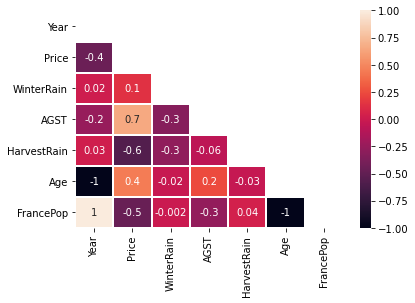

In [9]:
sns.heatmap(data = df.corr(),annot = True, vmin=-1,vmax=1,linewidths = 1,fmt=".1g",mask=np.triu(df.corr()))
plt.show()

In [10]:
df.nunique()

Year           25
Price          25
WinterRain     24
AGST           23
HarvestRain    24
Age            25
FrancePop      25
dtype: int64

In [11]:
df.drop("Year",axis=1,inplace=True)

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
x = df.drop("FrancePop",axis=1)
y = df["FrancePop"]

In [14]:
VIF = pd.DataFrame()
VIF["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
VIF["columns"] = x.columns
VIF.round(0)

,VIF,columns
0,609.0,Price
1,22.0,WinterRain
2,617.0,AGST
3,12.0,HarvestRain
4,9.0,Age


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=1)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(x_train,y_train)
predictions = model.predict(x_test)


In [17]:
model.coef_

array([ 219.85351485,   -0.72925599, -372.07059718,    1.3694272 ,
       -465.41301123])

In [18]:
model.intercept_

62442.822712246874

In [20]:
SSE = sum((y_test-predictions)**2)
print(SSE)

1778409.1089531034


In [21]:
TSS = y_test.var()*len(y_test)
print(TSS) 

64856505.55669701


In [22]:
R2 = 1-(SSE/TSS)

In [23]:
R2

0.9725793257948745

In [26]:
MAPE = sum(abs(y_test-predictions)/y_test)/len(y_test)

In [29]:
MAPE

0.008253752307438739

In [30]:
from sklearn import metrics

In [31]:
metrics.mean_absolute_error(y_test,predictions)

413.8710390401293